# Proyecto Julio César Sánchez 
## Diplomado en DataScience edición 5
### Proyecto de suficiencia económica para asumir la garantia de un producto


### Situación:
#### La compañía tiene un producto llamado Nox Sensor, el cual se ha vendido durante 2021 hasta mayo 2023, donde ya tiene un número de reclamaciones acumuladas para las cuales no se creó una provisión por el concepto de garantías, la empresa quiere continuar la venta del producto, pero debe determinar un monto de reserva para asumir los reclamos acumulados y lo que están por venir, ya que el producto tiene pactado una garantía de 24 meses a partir de la fecha de venta.


### Objetivo:

#### El área de contabilidad para generar la provisión debe de contar con cálculos que sustenten los montos a provisionar a las áreas de impuestos, al área de auditoría y sustentar bajo la normade la NIIF 15 -- que es la que nos habla de la necesidad de crear un pasivo en los libros de la compañía por el incurrimiento de costos por temas de garantías.
#### Como parte de este análisis y sustento se solicita lo siguiente:


##### 1- Cargar las bases desde un pagina simulando que estan en un repositorio de la compañia 

In [19]:
import pandas as pd


In [20]:
git_sd= "https://github.com/Julios82/garantias/raw/main/Sales_DB.xlsx"
ventas_df= pd.read_excel(git_sd, engine="openpyxl")

In [21]:
ventas_df.head(2)

,Currency,Period/Year,Document number,date_sales,Reference document,Currency key,quantity,ID_Product,ID_Profit,Business unit,...,General administrati,Income G&A costs,Other income,Other income selling,Other expenses,FI result w/o intere,Other result,Oth.TradeRelated G/L,Exchange rate,Origen
0,USD,5.2021,3720295,2021-05-12,2440948135,USD,300,RA0101531928,4874-04000,2120,...,0,0,0,0,0,0,0,0,1.0,"TOLUCA, ESTADO DE MEXICO"
1,USD,5.2021,3736970,2021-05-18,2440954623,USD,300,RA0101531928,4874-04000,2120,...,0,0,0,0,0,0,0,0,1.0,"TOLUCA, ESTADO DE MEXICO"


In [22]:
git_claim="https://github.com/Julios82/garantias/raw/main/Claim_Data.xlsx"
reclamos_df= pd.read_excel(git_claim, engine="openpyxl")

In [23]:
reclamos_df.head(2)

,Currency,Date_Purchers,Date_Claim,Reference document,Reference item no.,Currency key,ID_Product,Claim_quantity,ID_Profit,Cost_EA,Fee_Cost,Labor,Bill-To Party
0,USD,2021-05-28,2021-08-25,2441045837,10,MXN,RA0101531928,4,4875-05002,420,84,90.72,40000176
1,USD,2021-05-28,2021-08-25,2441045837,10,MXN,RA0101531928,5,4875-05002,525,105,113.40,40000176


In [24]:
git_pronost= "https://github.com/Julios82/garantias/raw/main/Forecast_2025.xlsx"
forecast_df= pd.read_excel(git_pronost, engine="openpyxl")

In [25]:
forecast_df.head(2)

,Date_Forecast,Sales_quantity,ID_Product,ID_Profit,Revenue_Forecast
0,2023-06-01,2500,RA0101531928,4874-04000,267500
1,2023-07-01,2500,RA0101531928,4874-04000,267500


##### Paso 1 del analisis .	Determinará cuantas piezas se  reclaman por mes, en total y promedio por mes del archivo de reclamos

In [26]:
reclamos_df['Date_Claim'] = pd.to_datetime(reclamos_df['Date_Claim'])

reclamos_por_mes = reclamos_df.groupby(reclamos_df['Date_Claim'].dt.strftime('%Y-%m'))['Claim_quantity'].agg(['sum', 'mean']).reset_index()
reclamos_por_mes.columns = ['Mes', 'Total_Reclamado', 'Promedio_Reclamado']

print(reclamos_por_mes)

        Mes  Total_Reclamado  Promedio_Reclamado
0   2021-08              297            7.425000
1   2021-12              916            7.633333
2   2022-01              601            7.512500
3   2022-02              309            7.725000
4   2022-03             6966            7.571739
5   2022-04             3337            7.584091
6   2022-06             1829            7.620833
7   2022-10              594            7.425000
8   2022-11              299            7.475000
9   2022-12             5726            7.614362
10  2023-01              887            7.391667
11  2023-04              912            7.600000


#### Paso 2 
- Se determina la cantidad de reclamos por mes.
- Se determina el numero promedio de dias en que sucede reclamo.


In [27]:
reclamos_df['Date_Purchers'] = pd.to_datetime(reclamos_df['Date_Purchers'])
reclamos_df['Date_Purchers'] = reclamos_df['Date_Purchers'] + pd.offsets.MonthEnd(0)
merged_df = reclamos_df.merge(ventas_df, on=['ID_Product', 'ID_Product'], how='inner')
merged_df['Fecha_Referencia'] = merged_df['Date_Purchers']
merged_df['Tiempo_Transcurrido'] = (merged_df['Date_Claim'] - merged_df['Fecha_Referencia']).dt.days
promedio_dias_reclamo = merged_df['Tiempo_Transcurrido'].mean()
reclamos_df['Mes'] = reclamos_df['Date_Claim'].dt.strftime('%Y-%m')
total_reclamos_piezas_por_mes = reclamos_df.groupby('Mes')['Claim_quantity'].sum().reset_index()

resultado_df = pd.DataFrame({
    'Promedio_Dias_Reclamo': [promedio_dias_reclamo]
})

print(total_reclamos_piezas_por_mes)

print(resultado_df)


        Mes  Claim_quantity
0   2021-08             297
1   2021-12             916
2   2022-01             601
3   2022-02             309
4   2022-03            6966
5   2022-04            3337
6   2022-06            1829
7   2022-10             594
8   2022-11             299
9   2022-12            5726
10  2023-01             887
11  2023-04             912
   Promedio_Dias_Reclamo
0              81.061497


### 2.1
- _Se aplica libreria Matplot par observar de manera grafica el comportamiento de los reclamos._

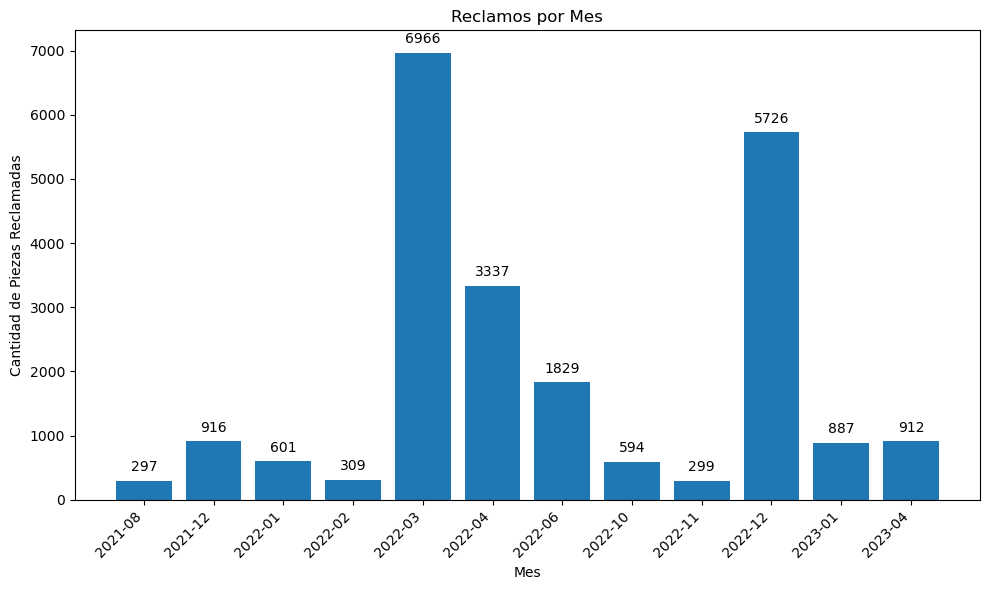

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(total_reclamos_piezas_por_mes['Mes'], total_reclamos_piezas_por_mes['Claim_quantity'])
plt.xlabel('Mes')
plt.ylabel('Cantidad de Piezas Reclamadas')
plt.title('Reclamos por Mes')
plt.xticks(rotation=45, ha="right")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 100, round(yval), ha='center', va='bottom')
plt.tight_layout()
plt.show()


#### 4. Reclamos realizado por los cliente.
- Se obtiene el numero promedio general de reclamos que han sucedido.
- El dato nos ayudara para la implementación del modelo de predicción

In [29]:
reclamos_df['Date_Claim'] = pd.to_datetime(reclamos_df['Date_Claim'])

reclamos_por_mes = reclamos_df.groupby(reclamos_df['Date_Claim'].dt.strftime('%Y-%m'))['Claim_quantity'].sum().reset_index()
reclamos_por_mes.columns = ['Mes', 'Total_Reclamado']

reclamos_por_mes['Dias_Mes'] = reclamos_por_mes['Mes'].apply(lambda x: pd.Timestamp(x).days_in_month)
reclamos_por_mes['Promedio_Reclamado'] = reclamos_por_mes['Total_Reclamado'] / reclamos_por_mes['Dias_Mes']

promedio_general = reclamos_por_mes['Total_Reclamado'].sum() / len(reclamos_por_mes)

print(reclamos_por_mes[['Mes', 'Total_Reclamado', 'Promedio_Reclamado']])
print("Promedio General de Reclamos:", promedio_general)


        Mes  Total_Reclamado  Promedio_Reclamado
0   2021-08              297            9.580645
1   2021-12              916           29.548387
2   2022-01              601           19.387097
3   2022-02              309           11.035714
4   2022-03             6966          224.709677
5   2022-04             3337          111.233333
6   2022-06             1829           60.966667
7   2022-10              594           19.161290
8   2022-11              299            9.966667
9   2022-12             5726          184.709677
10  2023-01              887           28.612903
11  2023-04              912           30.400000
Promedio General de Reclamos: 1889.4166666666667


### Se aplica un modelo SARIMAX para poder determinar el numero de reclamos que sucederan segun los historicos de los reclamos.
#### el codifo es muy eficiente pero se usara para una segunda etapa debido que tambien mide factores externos y no se cuenta con dichos datos
- Autoregressive (AR)
- Integrated (I)
- Moving Average (MA)
- Seasonal (S)
- MAX (Exogenous)

In [30]:
import numpy as np
from datetime import datetime, timedelta
import statsmodels.api as sm

fecha_actual = datetime(2023, 5, 31)
fecha_inicio_garantia = fecha_actual - timedelta(days=24 * 30)
fecha_limite_reclamaciones = fecha_actual - timedelta(days=81)


ventas_en_garantia = ventas_df[ventas_df['date_sales'] >= fecha_inicio_garantia]

reclamaciones_81_dias = reclamos_df[reclamos_df['Date_Claim'] >= fecha_limite_reclamaciones]

total_piezas_garantia = ventas_en_garantia['quantity'].sum()

total_piezas_reclamadas_81_dias = reclamaciones_81_dias.shape[0]


reclamaciones_diarias = reclamaciones_81_dias.groupby('Date_Claim').size()


rango_fechas = pd.date_range(end=fecha_actual, periods=90)
reclamaciones_diarias = reclamaciones_diarias.reindex(rango_fechas, fill_value=0)

modelo = sm.tsa.SARIMAX(reclamaciones_diarias, order=(0, 0, 1), seasonal_order=(0, 1, 1, 12))
resultados = modelo.fit()


pronostico_81_dias = resultados.get_forecast(steps=90)


piezas_probables_reclamadas = total_piezas_reclamadas_81_dias + pronostico_81_dias.predicted_mean.sum()

print(f"Número total de piezas dentro del período de garantía: {total_piezas_garantia}")
print(f"Número total de piezas reclamadas en los últimos 81 días: {total_piezas_reclamadas_81_dias}")
print(f"Número total de piezas que probablemente se reclamarán con un 95% de certeza en los próximos 81 días: {piezas_probables_reclamadas:.2f}")


Número total de piezas dentro del período de garantía: 193850
Número total de piezas reclamadas en los últimos 81 días: 120
Número total de piezas que probablemente se reclamarán con un 95% de certeza en los próximos 81 días: 257.14


### Se aplica el modelo ARIMA con las siguientes caracateristicas reales sin promedios para rebustecer la prediccion:
- Se determina la fecha de compra del reclamo para descartar y no duplicar garantias ya ejecutadas.
- Se filtra en las ventas los meses de las garantias ya ejecutadas.
- Se toma los tiempos de reclamo para la predicción.
- Se toma el numero de reclamos reales por mes para predicciones 
- Se hacen las comprobaciones:
    - Numeros de venta para asegurar que coinciden las ventas.
    - Numeros de piezas reclamadas
    - Numero de piezas sin reclamo garantías

Resumen de Piezas en Garantía y Riesgo de Reclamación:
----------------------------------------------------
Número de piezas vendidas hasta 2023-05-31 00:00:00: 193150
Número de piezas reclamadas hasta 2023-05-31 00:00:00: 22673
Número de piezas en garantía (vendidas pero no reclamadas) hasta 2023-05-31 00:00:00: 174580.34617776467
Número total de piezas que podrían ser reclamadas en fechas futuras: 4103.34617776468


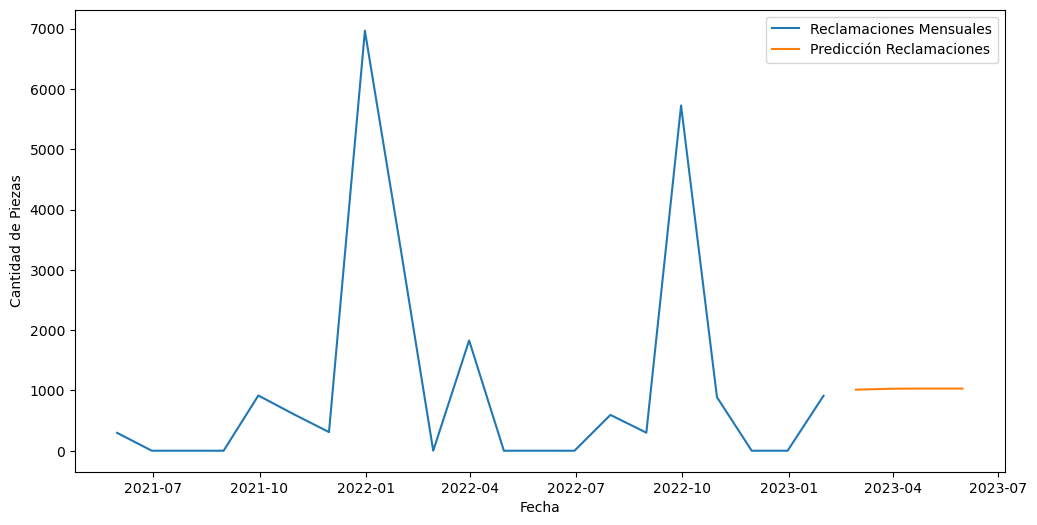

In [49]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

fechas_compra = pd.to_datetime(reclamos_df['Date_Purchers'])

fechas_reclamacion = pd.to_datetime(reclamos_df['Date_Purchers'])

ventas_df = ventas_df.reset_index(drop=True)
reclamos_df = reclamos_df.reset_index(drop=True)

# Se quita las ventas ya con reclamo
ventas_df = ventas_df[~ventas_df['date_sales'].isin(fechas_compra)]

# Se coloco como fecha el ultimo día del mes que se vendio como actual para no perder información por fecha

fecha_actual = pd.to_datetime('2023-05-31')
piezas_vendidas_hasta_fecha_actual = ventas_df[ventas_df['date_sales'] <= fecha_actual]['quantity'].sum()

piezas_reclamadas_hasta_fecha_actual = reclamos_df[reclamos_df['Date_Purchers'] <= fecha_actual]['Claim_quantity'].sum()

piezas_en_garantia = piezas_vendidas_hasta_fecha_actual - piezas_reclamadas_hasta_fecha_actual

# Crear una serie de tiempo de las reclamaciones mensuales
reclamaciones_mensuales = reclamos_df.set_index('Date_Purchers')['Claim_quantity'].resample('M').sum()


ultima_fecha_reclamacion = reclamaciones_mensuales.index.max()
meses_futuros = (fecha_actual - ultima_fecha_reclamacion).days // 30
modelo_arima_reclamaciones = ARIMA(reclamaciones_mensuales, order=(1, 1, 1))
resultado_arima_reclamaciones = modelo_arima_reclamaciones.fit()
predicciones_futuras_reclamaciones = resultado_arima_reclamaciones.get_forecast(steps=meses_futuros)
predicciones_reclamaciones_1 = predicciones_futuras_reclamaciones.predicted_mean

piezas_en_garantia += predicciones_reclamaciones_1.sum()

# Imprimir el resumen
print("Resumen de Piezas en Garantía y Riesgo de Reclamación:")
print("----------------------------------------------------")
print(f"Número de piezas vendidas hasta {fecha_actual}: {piezas_vendidas_hasta_fecha_actual}")
print(f"Número de piezas reclamadas hasta {fecha_actual}: {piezas_reclamadas_hasta_fecha_actual}")
print(f"Número de piezas en garantía (vendidas pero no reclamadas) hasta {fecha_actual}: {piezas_en_garantia}")
print(f"Número total de piezas que podrían ser reclamadas en fechas futuras: {predicciones_reclamaciones_1.sum()}")

# Aplicamos un grafico para ver comportamiento de reclamosde manera mensual con el lineal de las reclamciónes

Grafico = plt.figure(figsize=(12, 6))
plt.plot(reclamaciones_mensuales.index, reclamaciones_mensuales.values, label='Reclamaciones Mensuales')
plt.plot(predicciones_futuras_reclamaciones.predicted_mean.index, predicciones_reclamaciones_1, label='Predicción Reclamaciones')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Piezas')
plt.legend()
plt.show()

### Se analiza el forecast de venta de Junio 2023 a Diciembre 2025

#### Se carga nuevamente una bases de datos desde github


In [32]:
git_pronost= "https://github.com/Julios82/garantias/raw/main/Forecast_2025.xlsx"
forecast_df= pd.read_excel(git_pronost, engine="openpyxl")

In [33]:
git_sd= "https://github.com/Julios82/garantias/raw/main/Sales_DB.xlsx"
ventas_df= pd.read_excel(git_sd, engine="openpyxl")

In [34]:
git_claim="https://github.com/Julios82/garantias/raw/main/Claim_Data.xlsx"
reclamos_df= pd.read_excel(git_claim, engine="openpyxl")

### Se replica modelo ARIMA, para las base de datos forecast con las condiciones:

- Se determina el posible numero de reclamos que se van sucitar de las nuevas ventas
- Se aplica al modelo:
    - Se determina la fecha de compra del reclamo para descartar y no duplicar garantias ya ejecutadas.
    - Se filtra en las ventas los meses de las garantias ya ejecutadas.
    - Se toma los tiempos de reclamo para la predicción.
    - Se toma el numero de reclamos reales por mes para predicciones.

In [40]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from statsmodels.tsa.arima.model import ARIMA


    fechas_compra = pd.to_datetime(reclamos_df['Date_Purchers'])
    
    fechas_reclamo = pd.to_datetime(reclamos_df['Date_Claim'])

    reclamos_df['Dias_Entre_Venta_Reclamo'] = (fechas_reclamo - fechas_compra).dt.days

    ventas_df = ventas_df.reset_index(drop=True)
    reclamos_df = reclamos_df.reset_index(drop=True)

    ventas_df = ventas_df[~ventas_df['date_sales'].isin(fechas_compra)]

    fecha_actual = pd.to_datetime('2023-05-31')
    piezas_vendidas_hasta_fecha_actual = ventas_df[ventas_df['date_sales'] <= fecha_actual]['quantity'].sum()

    piezas_reclamadas_hasta_fecha_actual = reclamos_df[reclamos_df['Date_Claim'] <= fecha_actual]['Claim_quantity'].sum()

    reclamos_df['Costo_Total_Reclamo'] = reclamos_df['Cost_EA'] + reclamos_df['Fee_Cost'] + reclamos_df['Labor']

    costo_promedio_por_pieza = reclamos_df['Costo_Total_Reclamo'].sum() / piezas_reclamadas_hasta_fecha_actual
    reclamaciones_mensuales = reclamos_df.set_index('Date_Claim')['Claim_quantity'].resample('M').sum()

    promedio_reclamos_por_mes = reclamaciones_mensuales.mean()

    ultima_fecha_reclamacion = reclamaciones_mensuales.index.max()
    meses_futuros = (fecha_actual - ultima_fecha_reclamacion).days // 30 
    modelo_arima_reclamaciones = ARIMA(reclamaciones_mensuales, order=(1, 1, 1))
    resultado_arima_reclamaciones = modelo_arima_reclamaciones.fit()
    predicciones_futuras_reclamaciones = resultado_arima_reclamaciones.get_forecast(steps=meses_futuros)
    predicciones_reclamaciones = predicciones_futuras_reclamaciones.predicted_mean
    
#----------------------------------------------------------------------------------------------------------------------------- 

# Se aplica el modelo a la base de forecast.
    
    ventas_forecast_futuras = forecast_df[forecast_df['Date_Forecast'] > fecha_actual]

    piezas_vendidas_en_forecast = ventas_forecast_futuras['Sales_quantity'].sum()

    proporcion_garantias = piezas_reclamadas_hasta_fecha_actual / piezas_vendidas_hasta_fecha_actual

    garantias_futuras_forecast = ventas_forecast_futuras['Sales_quantity'].sum() * proporcion_garantias

    piezas_en_garantia += predicciones_reclamaciones.sum()




### Se crea un resumen de los resultados para el area de contabilidad.

In [42]:
import locale

# Configurar la configuración regional para el formato de dólares (en este caso, para Estados Unidos)
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')  # Asegúrate de que 'en_US.UTF-8' sea adecuado para tu región


'en_US.UTF-8'

In [43]:
total_reclamos_futuros =predicciones_reclamaciones_1.sum()+garantias_futuras_forecast
total_reclamos_futuros

14045.893938572342

In [44]:
monto_total_garantias= total_reclamos_futuros * costo_promedio_por_pieza
 
monto_total_garantias_usd = locale.currency(monto_total_garantias, grouping=True)

In [45]:
Monto_a_reservar_por_pieza=monto_total_garantias/piezas_vendidas_en_forecast
Monto_a_reservar_por_pieza_usd = locale.currency(Monto_a_reservar_por_pieza, grouping=True)


Resumen de Piezas en Garantía y Riesgo de Reclamación:
----------------------------------------------------
Número de piezas vendidas hasta 2023-05-31 00:00:00: 193150
Número de piezas reclamadas hasta 2023-05-31 00:00:00: 22673
Número de piezas en garantía (vendidas pero no reclamadas) hasta 2023-05-31 00:00:00: 174580.34617776467
Número total de piezas que podrían ser reclamadas en fechas futuras: 4103.34617776468
Garantías del forecast: 9942.547760807662
Número de piezas que se van a vender en el forecast: 84700
Promedio de días entre Venta y Reclamo: 89.0 días
Promedio de reclamos por mes: 1079.6666666666667
Costo promedio por pieza: 148.68
Total de reclamos a asumir: 14045.893938572342
Monto total de garantias que se debe asumir: $2,088,343.51
Monto que se debe provisionar por cada pieza vendida: $24.66


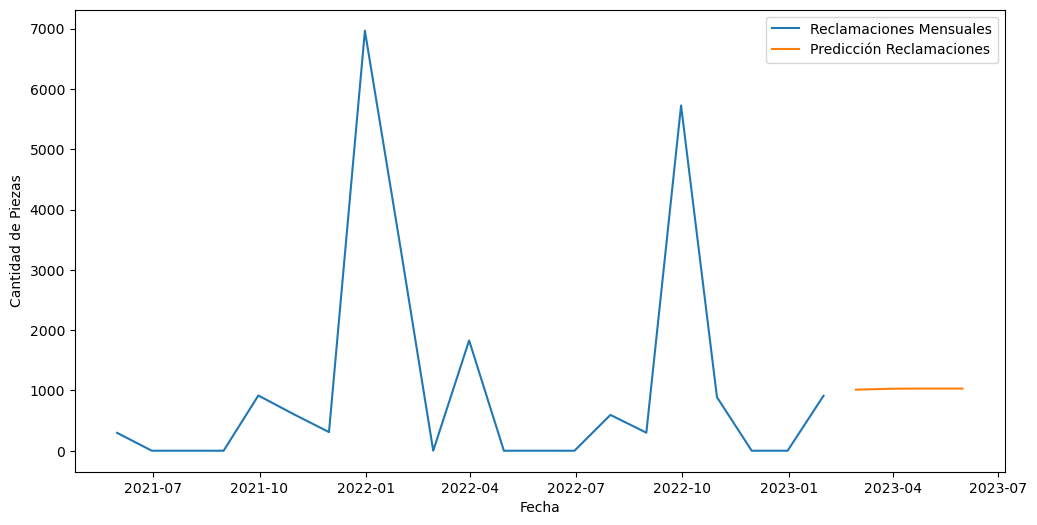

In [50]:
    print("Resumen de Piezas en Garantía y Riesgo de Reclamación:")
    print("----------------------------------------------------")
    print(f"Número de piezas vendidas hasta {fecha_actual}: {piezas_vendidas_hasta_fecha_actual}")
    print(f"Número de piezas reclamadas hasta {fecha_actual}: {piezas_reclamadas_hasta_fecha_actual}")
    print(f"Número de piezas en garantía (vendidas pero no reclamadas) hasta {fecha_actual}: {piezas_en_garantia}")
    print(f"Número total de piezas que podrían ser reclamadas en fechas futuras: {predicciones_reclamaciones_1.sum()}")
    print(f"Garantías del forecast: {garantias_futuras_forecast}")
    print(f"Número de piezas que se van a vender en el forecast: {piezas_vendidas_en_forecast}")
    print(f"Promedio de días entre Venta y Reclamo: {reclamos_df['Dias_Entre_Venta_Reclamo'].mean()} días")
    print(f"Promedio de reclamos por mes: {promedio_reclamos_por_mes.mean()}")
    print(f"Costo promedio por pieza: {costo_promedio_por_pieza}")
    print(f"Total de reclamos a asumir: {total_reclamos_futuros}")
    print(f"Monto total de garantias que se debe asumir: {monto_total_garantias_usd}")
    print(f"Monto que se debe provisionar por cada pieza vendida: {Monto_a_reservar_por_pieza_usd}")
    
    Grafico
    

### Se envia los datos mas relevantes al local host para simular envio a una API 

In [52]:
pip install Flask


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from flask import Flask, jsonify
app = Flask(__name__)
@app.route('/resultados', methods=['GET'])
def obtener_resultados():
    resultados = {
    
    "Numero_de_piezas_reclamadas": int(piezas_reclamadas_hasta_fecha_actual),
    "Total de reclamos por asumir": float(total_reclamos_futuros),
    "Monto que se debe provisionar por cada pieza vendida": float(Monto_a_reservar_por_pieza), 
    "Monto total de garantias que se debe asumir": float(monto_total_garantias),
    
        
}

    return jsonify(resultados)

if __name__ == '__main__':
    app.run()

    

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [05/Oct/2023 11:01:22] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [05/Oct/2023 11:01:22] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [05/Oct/2023 11:01:25] "GET /resultados HTTP/1.1" 200 -


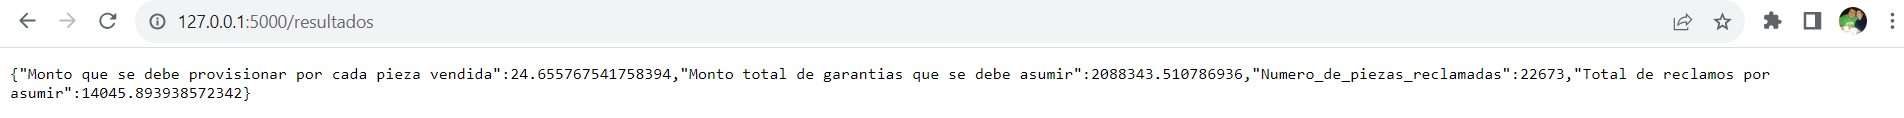